<a href="https://colab.research.google.com/github/shrestha-bikash/SRT-Simulator/blob/master/Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def half_adder(a, b):
    sum = a ^ b
    carry = a and b
    return carry, sum

def full_adder(a, b, cin = 0):
    carry1, sum1 = half_adder(a, b)
    carry2, sum = half_adder(sum1, cin)
    carry = carry1 or carry2
    return carry, sum

def convert_to_binary_list(s):
    return list(int(x,2) for x in list(s))

def convert_list_to_string(li):
    return ''.join(str(x) for x in li)

def binary_adder(a, b, carry = 0):
    an = len(a)
    bn = len(b)

    # Convert strings to list of bits
    if (type(a) == str) and (type(b) == str):
        al = convert_to_binary_list(a)
        bl = convert_to_binary_list(b)
    else:
        al = a
        bl = b

    # Pad smaller list with 0's
    diff = an - bn
    # more digits in a than b
    if diff > 0:
        for i in range(diff):
            bl.insert(0, 0)
    else:
        for i in range(abs(diff)):
            al.insert(0, 0)

    result = []
    # Iterate through list right to left, calling full_adder each time and inserting the sum each time
    for i in range(len(al)-1,-1,-1):
        carry, sum = full_adder(al[i], bl[i], carry)
        result.insert(0, sum)

    # print ('result: ', ''.join(str(x) for x in result)) #can be useful later

    return carry, result

a = '10'
b = '01'
carry, sum = binary_adder(a, b, 1)
print ('carry, sum: ', carry, sum)

carry, sum:  1 [0, 0]


In [0]:
def mux(a, b, c):
    c1, s1 = binary_adder(a, b, 0)
    c2, s2 = binary_adder(a, b, 1)
    if c == 0:
        return c1, s1
    else:
        return c2, s2

def carry_select(a, b):
    length = max(len(a), len(b))
    # print ('list: ', a[-4:])
    carry, sum = binary_adder(a[-4:], b[-4:], 0)
    result = sum
    for x in range(4, length, 4):
        # print ('x: ', x)
        # print('list:', a[-(x+4):-x])
        carry, sum = mux(a[-(x+4):-x], b[-(x+4):-x], carry)
        for i in sum[::-1]:
            result.insert(0, i)
    # print ('resultArr: ', result)
    time = 10 + int((length-4)/4) * 2
    return carry, result, time

res = carry_select([1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 0])
print (res)


(1, [0, 0, 1, 0, 1, 1], 10)


In [0]:
# https://www.dotnetperls.com/between-before-after-python

st = '0.00010001'

def after(value, a):
    # Find and validate first part.
    pos_a = value.rfind(a)
    if pos_a == -1: return ""
    # Returns chars after the found string.
    adjusted_pos_a = pos_a + len(a)
    if adjusted_pos_a >= len(value): return ""
    return value[adjusted_pos_a:]

val = after(st, '.')
print (val)

carry_select(val, val)
# carry, sum = binary_adder(val, val)




00010001


(0, [0, 0, 1, 0, 0, 0, 1, 0], 12)

In [0]:
def shifting(value, t):
    temp = value[:]
    if t != 0:
        while(t != 0):
            a = temp.pop(0)
            temp.append(a)
            t -= 1
    time = 3
    return temp, time

def shiftOver(value, a, stopCount = 100):
    temp = value[:]
    count = 0
    while(temp[0] == a):
        del temp[0]
        temp.append(a)
        count += 1
        if count == stopCount:
            break
    time = count * 3
    return temp, count, time

def shift_and_insert(value, v):
    temp = value[:]
    del temp[0]
    temp.append(v)
    time = 3
    return temp, time

def shift_right(value, v):
    temp = value[:]
    temp.pop()
    temp.insert(0, v)
    time = 3
    return temp, time

newval = convert_to_binary_list(val)
print (newval)

shiftzeros = shiftOver(newval, 0, 6)
print ('shiftover: ', shiftzeros)

shiftleft = shifting(newval, 3)
print ('shifting: ', shiftleft)

shiftinsert = shift_and_insert(newval, 1)
print ('shift and insert: ', shiftinsert)

shiftright = shift_right(newval, 1)
print ('shift right: ', shiftright)

[0, 0, 0, 1, 0, 0, 0, 1]
shiftover:  ([1, 0, 0, 0, 1, 0, 0, 0], 3, 9)
shifting:  ([1, 0, 0, 0, 1, 0, 0, 0], 3)
shift and insert:  ([0, 0, 1, 0, 0, 0, 1, 1], 3)
shift right:  ([1, 0, 0, 0, 1, 0, 0, 0], 3)


In [0]:
def twos_comp(val):
    if(type(val) == str):
        val = convert_to_binary_list(val)
        
    val = list(int(not x) for x in val)
    carry, s = binary_adder(val, [1])
    s.insert(0, 1)
    time = len(s)
    return s, time

bin_num = '11010'
twos_comp(bin_num)

([1, 0, 0, 1, 1, 0], 6)

In [0]:
# https://www.geeksforgeeks.org/python-ways-to-convert-hex-into-binary/

# def check_hex(value):
#     try:
#         val = int(value, 2)
#         return value
#     except ValueError:
#         print ('Not a binary number')
#         return convert_hex_to_binary(value)


def convert_hex_to_binary(value):

    # Code to convert hex to binary 
    n = int(value, 16)  
    bStr = '' 
    while n > 0: 
        bStr = str(n % 2) + bStr 
        n = n >> 1    
    res = bStr 
    return str(res)

def check_binary(value):
    index = value.find('binary')
    if index == -1:
        print ('Its a hex number: ', '.'+value)
        return convert_hex_to_binary(value)
    else:
        print ('Its a binary number', '.'+value)
        return value.replace(' (binary)', '')

In [0]:
# aq = '0.0010110101 (binary)'
# b = '0.01101 (binary)'

# aq = '0.0010100100 (binary)'
# b = '0.01111 (binary)'

# aq = '0.000011001100 (binary)'
# b = '0.011001 (binary)'

# aq = '.DE'
# b = '.E'

# aq = '.19'
# b = '.5'

# aq = '0.232' # quotient part in the given dataset is wrong
# b = '0.011111 (binary)'

# aq = '0.156' # remainder part in the given dataset is wrong
# b = '.101110 (binary)'

# aq = '.CD' # remainder part in the given dataset is wrong
# b = '.A' 

# aq = '.1000100010001 (binary)'
# b = '.100010 (binary)'

# aq = '.1111'
# b = '.22'

# aq = '.3333' # both quotient and remainder part in the given dataset is wrong
# b = '.11'

# aq = '.5AC2'
# b = '.79'

# aq = '.11001100110011 (binary)'
# b = '.0010001 (binary)'

#testing for overflow
# aq = '0.10001100 (binary)'
# b = '0.0111 (binary)'
# ['0.0010110101 (binary)', '0.01101 (binary)'],
# ['0.0010100100 (binary)', '0.01111 (binary)'],

data = [['.DE', '.E'],
        ['.19', '.5'],
        ['.CD', '.A'],
        ['.156', '.101110 (binary)'],
        ['.232', '.011111 (binary)'],
        ['.1111', '.22'],
        ['.3333', '.11'],
        ['.5AC2', '.79'],
        ['.9CDE11', '.ABC'],
        ['.672300', '.DEF'],
        ['.ABCDEF', '.987']]

def check_for_overflow(aq, b, t = 0):
    l = len(b)
    a = aq[:l]
    a_dec = int(a, 2)
    b_dec = int(b, 2)
    time = t
    if a_dec >= b_dec:
        print ('There is an overflow')
        aq_temp = convert_to_binary_list(aq)
        aq_temp, t = shift_right(aq_temp, 0)
        time += t
        aq = convert_list_to_string(aq_temp)
        print ('aq: '.ljust(25), aq, ''.ljust(5), time, 'delta t')
        return check_for_overflow(aq, b, time)
    else:
        print ('No overflow found')
        return aq, time

def normalize(b):
    b = convert_to_binary_list(b)
    cnt = 0
    time = 0
    if b[0] == 0:
        b, cnt, time = shiftOver(b, 0)
    
    return ''.join(str(x) for x in b), cnt, time

def srt(aq, b):
    exec_time = 0

    # Striping the digits after a decimal point
    aq = after(aq, '.')
    b = after(b, '.')

    # Checking for binary numbers and converting hex to binary
    aq = check_binary(aq)
    b = check_binary(b)

    aql = len(aq)

    # Checking the length of dividend and adjusting the length
    if (aql > 4 and aql < 8):
        aql = 8
        aq = aq.zfill(aql)
           
    elif (aql > 8 and aql < 12):
        aql = 12
        aq = aq.zfill(aql)

    elif (aql > 12 and aql < 16):
        aql = 16
        aq = aq.zfill(aql)

    elif (aql > 16 and aql < 24):
        aql = 24
        aq = aq.zfill(aql)

    # if (aql % 2) != 0:
    #     aq = aq.zfill(aql+1)
    #     aql = len(aq)

    # If the divisor is less than 4 bit, fill it with 0 to make it 4 bits.
    if len(b) < 4:
        b = b.zfill(4)

    l = len(b)

    if l > aql/2:
        aq = aq.zfill(l*2)
        aql = len(aq)
    elif int(aql/2) > l:
        b = b.zfill(int(aql/2))
        l = len(b)

    print ('length of AQ: ', aql)
    print ('length of B: ', l)
    
    stopCount = l + 1
    a = aq[:l]
    count = 0

    aq, t_overflow = check_for_overflow(aq, b)
    exec_time += t_overflow

    print ('aq: '.ljust(25), aq, ''.ljust(5), exec_time, 'delta t')
    aq = convert_to_binary_list(aq)
    # print ('aq: ', aq)

    print ('unnormalized b: '.ljust(25), b)
    b, cnt, t_norm = normalize(b)
    exec_time += t_norm
    
    b = convert_to_binary_list(b)
    print ('Normalized b: '.ljust(25), b, ''.ljust(5), exec_time, 'delta t')
    
    b_comp, t_comp = twos_comp(b)
    exec_time += t_comp
    print ('Twos comp b: '.ljust(22), b_comp, ''.ljust(5), exec_time, 'delta t')

    if cnt > 0:
        aq, t_shift = shifting(aq, cnt)
        exec_time += t_shift
        print ('\n\nAdjusting aq: '.ljust(42), aq, ''.ljust(5), exec_time, 'delta t')
    
    if aq[0] == 0:
        aq, c, t_sover = shiftOver(aq, 0, stopCount-count)
        exec_time += t_sover
        print('Shiftover 0s: '.ljust(40), aq, ''.ljust(5), exec_time, 'delta t')
        count += c

    a = aq[:l]
    q = aq[l:]
    # print ('A: ', a)

    print ('Subtract B: '.ljust(37), b_comp)
    car, a, t_adder = carry_select(a, b_comp)
    exec_time += t_adder

    for i in q:
        a.append(i)
    aq = a

    # print ('After subtracting b: '.ljust(37), aq, ''.ljust(5), exec_time, 'delta t')
    while (count <= stopCount):
        if aq[0] == 0:
            print ('+ve result: '.ljust(37), aq, ''.ljust(5), exec_time, 'delta t')
        else:
            print ('-ve result: '.ljust(37), aq, ''.ljust(5), exec_time, 'delta t')

        checkbit = aq.pop(0)
        # print('After poping: ', aq)
        if (checkbit == 0):
            aq, t_shiftinsert = shift_and_insert(aq, 1)
            exec_time += t_shiftinsert
            print('shiftL and insert 1 to Qo: '.ljust(40), aq, ''.ljust(5), exec_time, 'delta t')

            count += 1
            # print('**** SHIFT COUNT **** '.ljust(10), count, '\n')
            if count == stopCount:
                break
            if aq[0] == 0:
                aq, c, t_soverzero = shiftOver(aq, 0, stopCount-count)
                exec_time += t_soverzero
                print('Shiftover 0s: '.ljust(40), aq, ''.ljust(5), exec_time, 'delta t')
                count += c
                # print('**** SHIFT COUNT **** '.ljust(10), count, '\n')

            if count == stopCount:
                break
            a = aq[:l]
            q = aq[l:]
            # print ('A: ', a)
            a.insert(0, checkbit)
            print ('Subtract B: '.ljust(37), b_comp)
            car, a, t_sub = carry_select(a, b_comp)
            exec_time += t_sub
        else:
            aq, t_shiftinsert = shift_and_insert(aq, 0)
            exec_time += t_shiftinsert
            print('shiftL and insert 0 to Qo: '.ljust(40), aq, ''.ljust(5), exec_time, 'delta t')

            count += 1
            # print('**** SHIFT COUNT **** '.ljust(10), count, '\n')
            if count == stopCount:
                break
            if aq[0] == 1:
                aq, c, t_soverone = shiftOver(aq, 1, stopCount-count)
                exec_time += t_soverone
                print('Shiftover 1s: '.ljust(40), aq, ''.ljust(5), exec_time, 'delta t')
                count += c
                # print('**** SHIFT COUNT **** '.ljust(10), count, '\n')
            if count == stopCount:
                break
            a = aq[:l]
            q = aq[l:]
            # print ('A: ', a)
            a.insert(0, checkbit)
            print ('Add B: '.ljust(40), b)
            car, a, t_add = carry_select(a, b)
            exec_time += t_add
            # a.insert(0, car)

        for i in q:
            a.append(i)
        aq = a
        
    
    print ('\nCheckbit', checkbit)
    r = []
    a = aq[:l]
    q = aq[l:]
    if checkbit == 1:
        print ('*** Correcting the remainder by shifting high order half of AQ right and adding b ***')
        a, t_sright = shift_right(a, 1)
        exec_time += t_sright
        print ('Shift right a: '.ljust(40), a, ''.ljust(5), exec_time, 'delta t')

        print ('Add B: '.ljust(40), b)
        car, a, t_addition = carry_select(a, b)
        exec_time += t_addition
        print ('After adding B: '.ljust(40), a, ''.ljust(5), exec_time, 'delta t')
        r = a[:(aql - count-cnt+1)]
    else:
        r = a[:(aql - count-cnt)]

    print ('\n')
    print('Quoteint: '.ljust(25), '.' + convert_list_to_string(q))
    print('Remainder: '.ljust(25), '.' + convert_list_to_string(r).zfill(aql))

    print('Execution time: '.ljust(25), exec_time, 'delta t')
    return l, exec_time

result = srt(data[8][0], data[8][1])

Its a hex number:  .9CDE11
Its a hex number:  .ABC
length of AQ:  24
length of B:  12
No overflow found
aq:                       100111001101111000010001       0 delta t
unnormalized b:           101010111100
Normalized b:             [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]       0 delta t
Twos comp b:           [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]       13 delta t
Subtract B:                           [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
-ve result:                           [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]       27 delta t
shiftL and insert 0 to Qo:               [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]       30 delta t
Shiftover 1s:                            [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]       39 delta t
Add B:                                   [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
-ve result:                           [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0

In [0]:
# print (check_binary('1111 (binary)'))
# print (int('5ac2', 16))
# print (int('79', 16))
# print(convert_hex_to_binary('5ac2'))
# print(convert_hex_to_binary('79'))

result = []
for index, item in enumerate(data):
    res = srt(item[0], item[1])
    result.append(list(res))


Its a hex number:  .DE
Its a hex number:  .E
length of AQ:  8
length of B:  4
No overflow found
aq:                       11011110       0 delta t
unnormalized b:           1110
Normalized b:             [1, 1, 1, 0]       0 delta t
Twos comp b:           [1, 0, 0, 1, 0]       5 delta t
Subtract B:                           [1, 0, 0, 1, 0]
-ve result:                           [1, 1, 1, 1, 1, 1, 1, 1, 0]       15 delta t
shiftL and insert 0 to Qo:               [1, 1, 1, 1, 1, 1, 0, 0]       18 delta t
Shiftover 1s:                            [1, 1, 0, 0, 1, 1, 1, 1]       30 delta t

Checkbit 1
*** Correcting the remainder by shifting high order half of AQ right and adding b ***
Shift right a:                           [1, 1, 1, 0]       33 delta t
Add B:                                   [1, 1, 1, 0]
After adding B:                          [1, 1, 0, 0]       43 delta t


Quoteint:                 .1111
Remainder:                .00001100
Execution time:           43 delta t
Its a he

result:  [[  4  43]
 [  4  43]
 [  4  46]
 [  6  51]
 [  6  57]
 [  8  66]
 [  8  74]
 [  8  78]
 [ 12  97]
 [ 12 136]
 [ 12 153]]


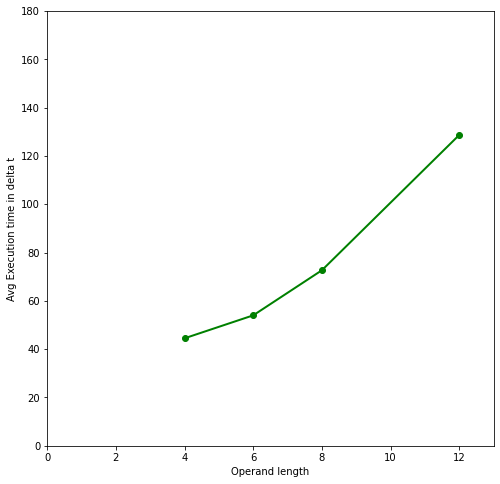

In [0]:
import numpy as np

result = np.array(result)
result = np.sort(result, axis=0)
print ('result: ', result)

x = [4, 6, 8, 12]
y = [44.5, 54, 72.66, 128.66]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(x, y, 'go-', linewidth=2)
plt.axis([0, 13, 0, 180])

plt.ylabel('Avg Execution time in delta t')
plt.xlabel('Operand length')
plt.show()